# Syria Tel Customers

**Author:** Bridget Coleman
***

## Overview

Syria Tel is a communications company.  A company can expect a certain amount of turnover in custumers.  I examined the percentage of turnover and looked at reasons for why a customer may leave.



## Business Problem

It can be more expensive to get new clients versus retaining current clients.  The question is what makes a customer leave.  Can we predict when a customer is considering changing phone services?  What incentive can we give to make them reconsider?  

## Data Understanding

The data has been collected from Kaggle.  The dataset has the information from 3,333 customers.  The dataset has information on the length of account, types of plans, minutes charged, and if they terminated the service.  

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from xgboost import XGBClassifier

np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\bkcoleman1024\anaconda3\lib\site-packages (0.8.0)
Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
from imblearn.over_sampling import SMOTE, ADASYN

In [5]:
telecom = pd.read_csv('telecom.csv')
telecom.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
telecom.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
telecom.shape

(3333, 21)

In [8]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [9]:
#Reformat column names

telecom.columns = [x.lower().replace(' ', '_') for x in telecom.columns]
telecom.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
telecom['churn'].unique()

array([False,  True])

In [11]:
#Number of true and false values in churn

telecom['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

Out of the 3333 customers 14.49% decided to leave Syria.  How can we reduce this turn over rate?  Why did these customers decide to leave?  What can we do to make them stay?  What is the potential cost to get them to stay versus trying to get new customers? 

In [12]:
#Checking the number of unique area codes

telecom["area_code"].value_counts()


415    1655
510     840
408     838
Name: area_code, dtype: int64

In [13]:
#Broken down by area codes.

print(telecom.groupby(['area_code'])['churn'].mean())

area_code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64


Only three area codes are present in this data set.

The phone numbers and area codes won't matter and so I am removing them.  I am also removing the states.

In [14]:
telecom.drop(columns = 'phone_number', axis=1, inplace = True)
telecom.drop(columns = 'area_code', axis=1, inplace = True)
telecom.drop(columns = 'state', axis=1, inplace = True)
telecom.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False



As I cleaning and examing the data, I am looking closer at the customer service calls. 

In [15]:
#How many unique values for customer service calls

telecom['customer_service_calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer_service_calls, dtype: int64

In [16]:
print(telecom.groupby(['customer_service_calls'])['churn'].mean())

customer_service_calls
0    0.131994
1    0.103302
2    0.114625
3    0.102564
4    0.457831
5    0.606061
6    0.636364
7    0.555556
8    0.500000
9    1.000000
Name: churn, dtype: float64


In [17]:
# Change international and voicemail columns to integers

telecom.international_plan.replace(('yes', 'no'), (1,0), inplace = True)
telecom.voice_mail_plan.replace(('yes', 'no'), (1,0), inplace = True)
telecom.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [18]:
y = telecom['churn']
X = telecom.drop(columns='churn', axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

# Imbalance

There is an imbalance in our data.  If I was to run models without adjusting for this.  I will use SMOTE

In [20]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
X, y = SMOTE().fit_resample(X, y)
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

False    2850
True      483
Name: churn, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

True     2141
False    2141
Name: churn, dtype: int64


In [21]:
telecom.corr()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
account_length,1.000000,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
international_plan,0.024735,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice_mail_plan,0.002918,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number_vmail_messages,-0.004628,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,0.006216,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.038470,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,0.006214,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,-0.006757,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_eve_calls,0.019260,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total_eve_charge,-0.006745,0.019106,0.021559,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786


In [22]:
def model(model, X, y):
    model = model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
    
    # Predict on training and test sets
    training_preds = model.predict(X_train)
    test_preds = model.predict(X_test)



    print(model.fit(X_train, y_train))
    
    
    print(f"Training recall score: {recall_score(y_train, model.predict(X_train))}")
    print(f"Test recall score: {recall_score(y_test, model.predict(X_test))}")
        
    print(f"Cross val Score train:  {cross_val_score(model, X_train, y_train, cv=5, scoring='recall')}")
    print(f"Cross val Score test:  {cross_val_score(model, X_test, y_test, cv=5, scoring='recall')}")
            
    print(f"Train: {confusion_matrix(y_train, model.predict(X_train))}")
    print(f"Test: {confusion_matrix(y_test, model.predict(X_test))}")
    


In [35]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
tree_clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [36]:
model(tree_clf, X, y)

DecisionTreeClassifier(max_depth=5, random_state=42)
Training recall score: 0.6934812760055479
Test recall score: 0.7132459970887919
Cross val Score train:  [0.68981481 0.71759259 0.67898383 0.6812933  0.71362587]
Cross val Score test:  [0.72992701 0.67883212 0.73722628 0.66666667 0.71014493]
Train: [[2036   76]
 [ 663 1500]]
Test: [[702  36]
 [197 490]]


In [25]:
# Feature importance
tree_clf.feature_importances_

array([0.        , 0.07077169, 0.08211828, 0.        , 0.06481112,
       0.00334387, 0.29433311, 0.01921658, 0.00291866, 0.10550907,
       0.        , 0.00272125, 0.00587812, 0.06060958, 0.06275842,
       0.        , 0.22501026])

In [26]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10,10))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

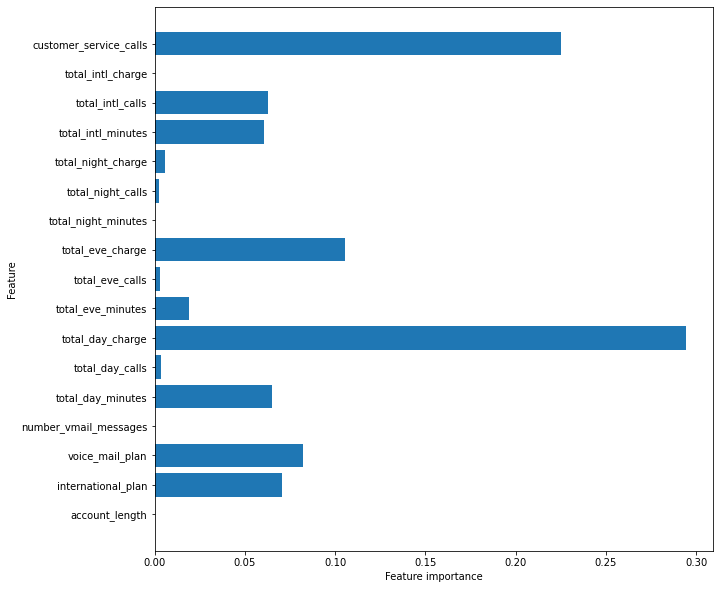

In [27]:
plot_feature_importances(tree_clf)

From this chart the following features are th

In [28]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [29]:
model(bagged_tree, X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)
Training recall score: 0.7179842810910773
Test recall score: 0.7365356622998545
Cross val Score train:  [0.69675926 0.72916667 0.69053118 0.70438799 0.71593533]
Cross val Score test:  [0.70072993 0.71532847 0.73722628 0.72463768 0.73913043]
Train: [[2025   87]
 [ 610 1553]]
Test: [[698  40]
 [181 506]]


In [31]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [32]:
model(forest, X, y)

RandomForestClassifier(max_depth=5)
Training recall score: 0.7484974572353214
Test recall score: 0.7510917030567685
Cross val Score train:  [0.7337963  0.75694444 0.70900693 0.77367206 0.7482679 ]
Cross val Score test:  [0.71532847 0.72262774 0.67153285 0.72463768 0.74637681]
Train: [[1986  126]
 [ 544 1619]]
Test: [[680  58]
 [171 516]]


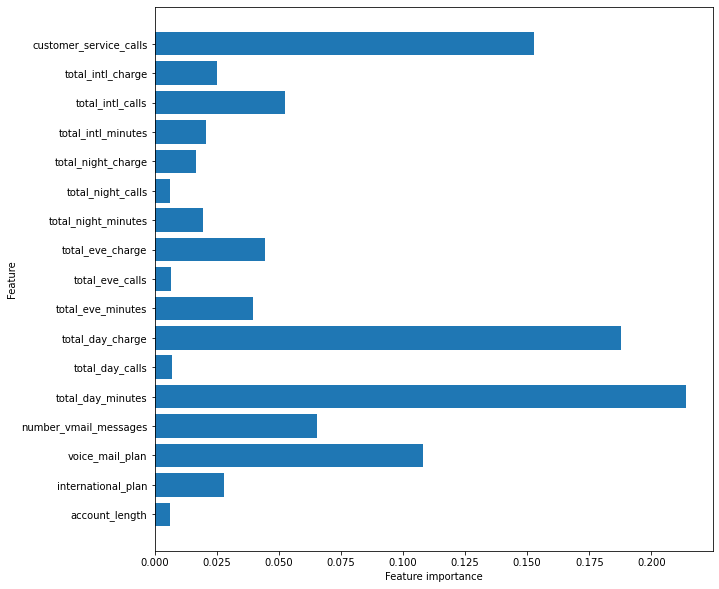

In [33]:
plot_feature_importances(forest)

Based on this customer service calls, day charges, day minutes, and an international plan have an impact on whether a customer leaves.  

Based on the results of this model, there seems to be an overfit.  